# Python BaseCamp (Chennai)

### By Karthikeyan Sankaran, 17th June, 2018

## Python Visualization

Jake Vanderplas talk on Python Visualization Landscape: https://www.youtube.com/watch?v=FytuB8nFHPQ

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Example dataframe: df1

x1 = np.linspace(0,5,11)
y1 = x1**2

df1 = pd.DataFrame({'x1':x1,'y1':y1})
df1.head()

,x1,y1
0,0.0,0.00
1,0.5,0.25
2,1.0,1.00
3,1.5,2.25
4,2.0,4.00


In [6]:
# Example dataframe: ads

ads = pd.read_csv("..\datasets\Online-ads.csv")
ads.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Matplotlib - Foundation for Python Plotting **

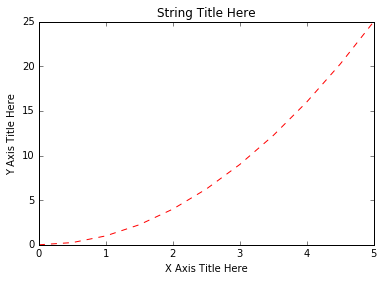

In [7]:
x = df1['x1'].values
y = df1['y1'].values

plt.plot(x, y, 'r--') # 'r' is the color red, '--' is the line style
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

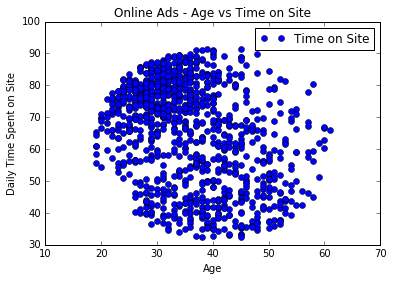

In [8]:
x = ads['Age'].values
y = ads['Daily Time Spent on Site'].values

# Setting the plot size
plt.figure(figsize=(6,4))

plt.plot(x, y, 'bo',label='Time on Site') # setting color, marker and label
plt.xlabel('Age')
plt.ylabel('Daily Time Spent on Site')
plt.title('Online Ads - Age vs Time on Site')
plt.legend(loc="upper right")
plt.show()

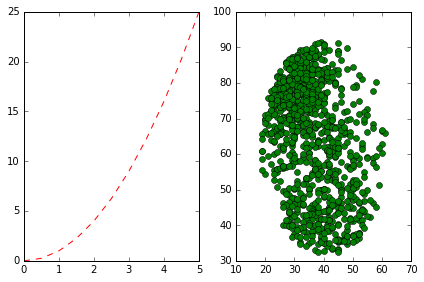

In [9]:
# Creating subplots
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(df1['x1'].values, df1['y1'].values, 'r--') # More on color options later
plt.subplot(1,2,2)
plt.plot(ads['Age'].values, ads['Daily Time Spent on Site'].values, 'go')
plt.tight_layout()

### Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

In [10]:
plt.savefig("filename.png")

___
# Matplotlib Object Oriented Method
Now that we've seen the basics, let's break it all down with a more formal introduction of Matplotlib's Object Oriented API. This means we will instantiate figure objects and then call methods or attributes from that object.

## Introduction to the Object Oriented Method

The main idea in using the more formal Object Oriented method is to create figure objects and then just call methods or attributes off of that object. This approach is nicer when dealing with a canvas that has multiple plots on it. 

To begin we create a figure instance. Then we can add axes to that figure:

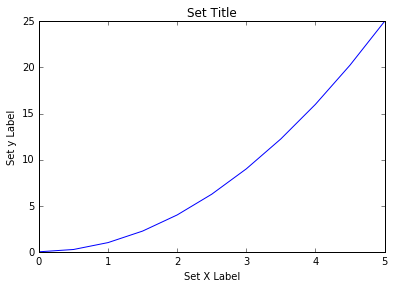

In [11]:
# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x1, y1, 'b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023321CD2BE0>,
      dtype=object)

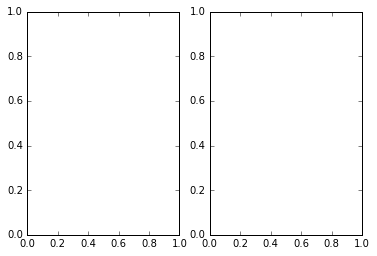

In [12]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)
axes

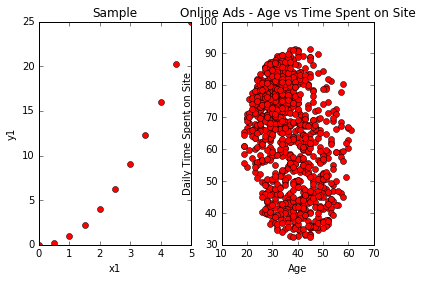

In [13]:
count = 0
for ax in axes:
    if count==0:
        x = df1['x1'].values
        y = df1['y1'].values
        xlabel = 'x1'
        ylabel = 'y1'
        title = 'Sample'
    else:
        x = ads['Age']
        y = ads['Daily Time Spent on Site']
        xlabel = 'Age'
        ylabel = 'Daily Time Spent on Site'
        title = 'Online Ads - Age vs Time Spent on Site'
        
    ax.plot(x, y,'ro')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
    count = count + 1
# Display the figure object    
fig

** Seaborn - For Statistical Plotting **

In [15]:
import seaborn as sns

sns.set_style("whitegrid")

** 1. Find the distribution of 'Time Spent on Site' **

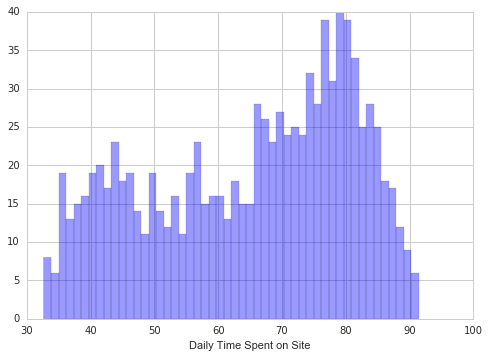

In [16]:
sns.distplot(ads['Daily Time Spent on Site'],bins=50,color='blue',kde=False)

** 2. Find the joint distribution of "Time spent on Site" vs "Daily Internet Usage" **

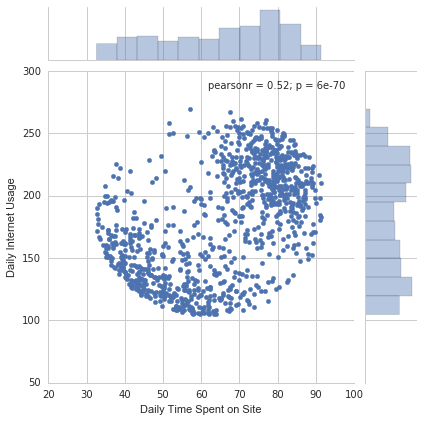

In [17]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ads)

** 3. Count the number of ads clicked **

C:\Users\Karthikeyan\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


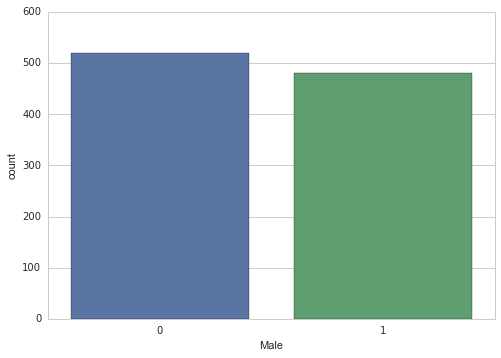

In [18]:
sns.countplot(x='Male',data=ads)

** 4. Boxplot that shows 'Daily Time Spent on Site' vs 'Clicked on Ad' **

C:\Users\Karthikeyan\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


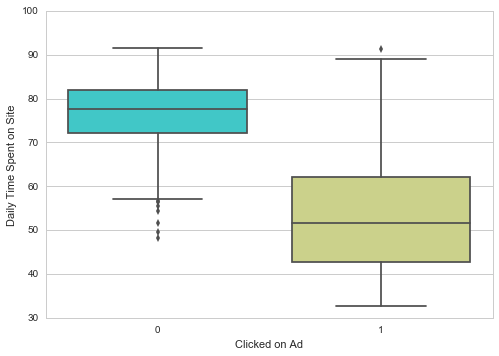

In [77]:
sns.boxplot(x='Clicked on Ad',y='Daily Time Spent on Site',data=ads,palette='rainbow')

** 5. Plot that shows the distribution of datapoints around 'Daily Time Spent on Site' vs 'Clicked on Ad' **

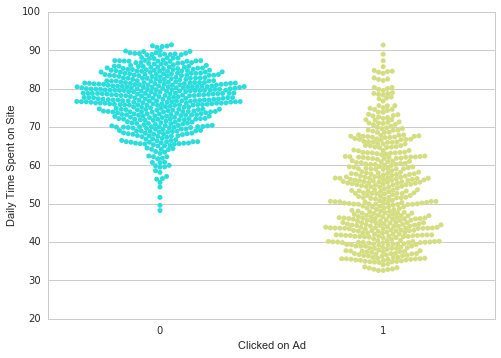

In [19]:
sns.swarmplot(x='Clicked on Ad',y='Daily Time Spent on Site',data=ads,palette='rainbow')

** 5. Heatmap of correlation between variables **

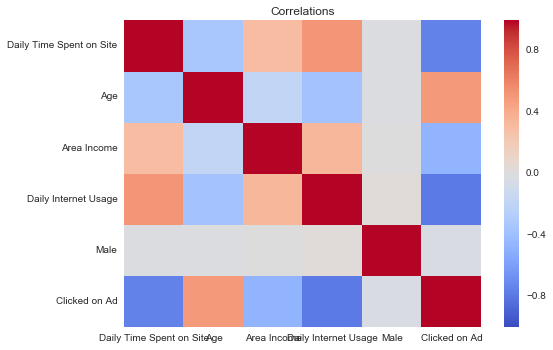

In [81]:
sns.heatmap(ads.corr(),cmap='coolwarm')
plt.title('Correlations')

** 6. Show the "Daily Time Spent on Site" faceted by "Male" **

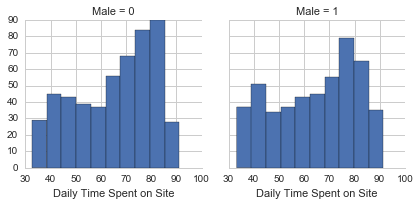

In [83]:
g = sns.FacetGrid(data=ads,col='Male')
g.map(plt.hist,'Daily Time Spent on Site')